# Análise dos Episódios de Simpsons

## Introdução
Neste notebook, iremos realizar uma análise exploratória dos dados dos episódios de Simpsons. Vamos explorar diferentes aspectos dos episódios, incluindo a distribuição da classificação IMDb, a popularidade com base no número de visualizações e a correlação entre a classificação IMDb e o número de visualizações.

## Bibliotecas Utilizadas
- Pandas: Para manipulação e análise dos dados.
- Matplotlib: Para visualização de gráficos.


In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregando o dataset
file_path = 'data/simpsons_episodes.csv'
simpsons_episodes = pd.read_csv(file_path)

## Distribuição da Classificação IMDb dos Episódios

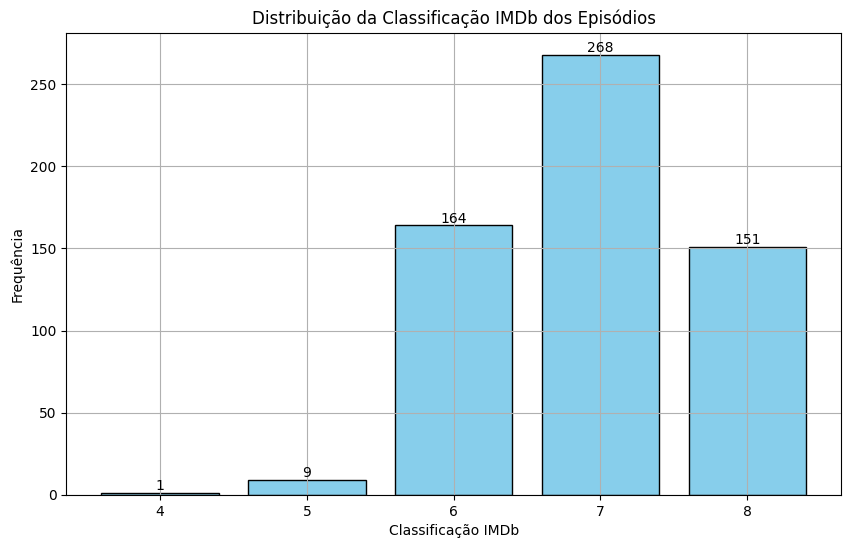

In [53]:
# Visualização da distribuição da classificação IMDb
plt.figure(figsize=(10, 6))
plt.bar(bins[:-1], counts, color='skyblue', edgecolor='black', width=0.8)
plt.title('Distribuição da Classificação IMDb dos Episódios')
plt.xlabel('Classificação IMDb')
plt.ylabel('Frequência')
plt.grid(True)

# Adicionando números acima das barras
for i in range(len(counts)):
    plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.show()


In [49]:
# Estatísticas descritivas
desc_stats = simpsons_episodes['imdb_rating'].describe()

# Criando uma tabela com as estatísticas descritivas
desc_stats_table = pd.DataFrame(desc_stats)
desc_stats_table.columns = ['Classificação IMDb']
desc_stats_table.index.name = 'Estatísticas'
desc_stats_table.style.format("{:.2f}")

# Exibindo a tabela
desc_stats_table


,Classificação IMDb
Estatísticas,
count,597.000000
mean,7.386097
std,0.732439
min,4.500000
25%,6.900000
50%,7.300000
75%,8.000000
max,9.200000


## Visualização da Distribuição das Visualizações

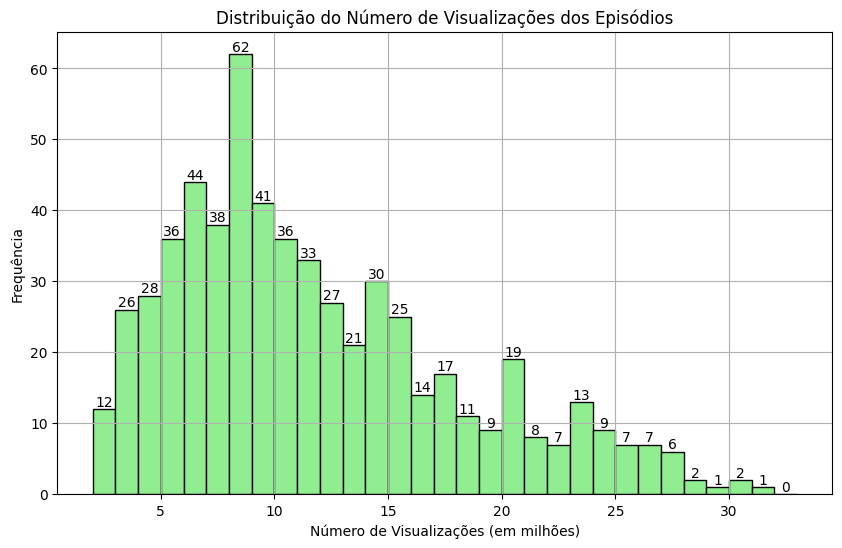

In [36]:
# Visualização da distribuição das visualizações
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(simpsons_episodes['us_viewers_in_millions'], bins=range(int(min(simpsons_episodes['us_viewers_in_millions'])), int(max(simpsons_episodes['us_viewers_in_millions'])) + 1), color='lightgreen', edgecolor='black')
plt.title('Distribuição do Número de Visualizações dos Episódios')
plt.xlabel('Número de Visualizações (em milhões)')
plt.ylabel('Frequência')
plt.grid(True)

# Adicionando números por cima das barras
for i in range(len(counts)):
    plt.text(bins[i] + 0.5, counts[i], str(int(counts[i])), ha='center', va='bottom')

plt.show()


## Identificação dos Episódios Mais Populares

In [24]:
# Identificação dos episódios mais populares
top_episodes = simpsons_episodes.nlargest(10, 'us_viewers_in_millions')
print("Top 10 Episódios Mais Populares:")
print(top_episodes[['title', 'us_viewers_in_millions']])


Top 10 Episódios Mais Populares:
                        title  us_viewers_in_millions
2            Bart Gets an "F"                    33.6
217     Life on the Fast Lane                    33.5
218       The Crepes of Wrath                    31.2
1          Krusty Gets Busted                    30.4
0           Homer's Night Out                    30.3
220       Simpson and Delilah                    29.9
24          Lisa's First Word                    28.6
245         The Telltale Head                    28.0
26   The Call of the Simpsons                    27.6
550           Homer's Odyssey                    27.5


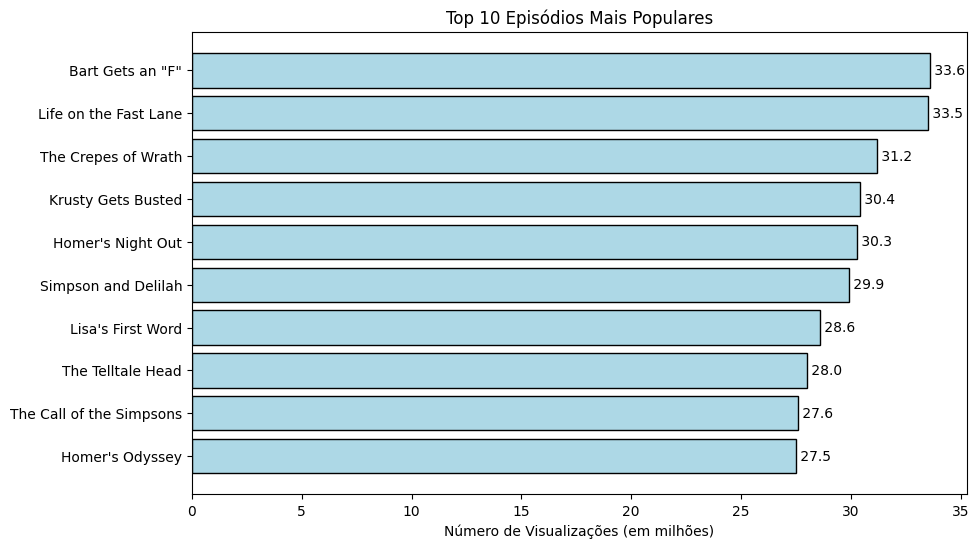

In [30]:
plt.figure(figsize=(10, 6))
bars = plt.barh(top_episodes['title'], top_episodes['us_viewers_in_millions'], color='lightblue', edgecolor='black')

# Adicionando o número de visualizações dentro de cada barra
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width():.1f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Número de Visualizações (em milhões)')
plt.title('Top 10 Episódios Mais Populares')
plt.gca().invert_yaxis()  # Inverte a ordem dos episódios para o mais popular ficar no topo
plt.show()
